# Project : Mall Customer Segmentation



---
# **Table of Contents**
---
**1.** [**Introduction**](#Section1)<br>

**2.** [**Problem Statement**](#Section2)<br>

**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section41)
  - **4.2** [**Data Description**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)
  - **5.2** [**Handling of Missing Data**](#Section52)<br>
  - **5.3** [**Feature Engineering.**](#Section53)<br>
  - **5.4** [**Post Processing Report**](#Section54)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>

**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>
  - **7.1** [**Feature Selection**](#Section71)<br>
  - **7.2** [**Encoding the Categorical Data**](#Section72)<br>
  - **7.3** [**Data Preparation**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**ModelName - Baseline Model**](#Section81)<br>
  - **8.2** [**Using Trained Model for Prediction**](#Section82)<br>
  - **8.3** [**Model Evaluation**](#Section83)<br>

**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

---
<a name = Section1></a>
# **1. Introduction**
---


<center><img src="https://github.com/LishaJayesh/Machine-Learning-Projects/blob/main/Customer%20Segmentation/Images/image%201.jpg?raw=true" /></center>


These days, you can personalize everything. There’s no one-size-fits-all approach. But, for business, this is actually a great thing. It creates a lot of space for healthy competition and opportunities for companies to get creative about how they acquire and retain customers.

One of the fundamental steps towards better personalization is customer segmentation. It simply means grouping your customers according to various characteristics (for example grouping customers by age).It’s a way for organizations to understand their customers. Knowing the differences between customer groups, it’s easier to make strategic decisions regarding product growth and marketing.This is where personalization starts, and proper segmentation will help you make decisions regarding new features, new products, pricing, marketing strategies, even things like in-app recommendations.

But, doing segmentation manually is time consuming and can be exhausting. Machine learning methodologies are a great tool for analyzing customer data and finding insights and patterns.They can precisely identify customer segments, which is much harder to do manually or with conventional analytical methods. There are many machine learning algorithms, each suitable for a specific type of problem. One very common machine learning algorithm that’s suitable for customer segmentation problems is the k-means clustering algorithm. 

Implementing customer segmentation leads to plenty of new business opportunities. You can do a lot of optimization in:
 - Budgeting, 
 - Product design, 
 - Promotion, 
 - Marketing, 
 - Customer satisfaction.


---
<a name = Section2></a>
# **2. Problem Statement**
---
<center><img src="https://github.com/LishaJayesh/Machine-Learning-Projects/blob/main/Customer%20Segmentation/Images/Enhance%20customer%20loyalty.jpg?raw=true"width="800", height="200"/></center>

### **Scenario (Hypothetical)**

- BRENDA an American company owns a supermarket mall and through membership cards , they have some basic data about their customers like Customer ID, age, gender, annual income and spending score. Spending Score is something they assign to the customer based on their defined parameters like customer behavior and purchasing data.

- They want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

- They have accumulated a dataset with customer demographics and spending score.

**The data science consultant is to analyse the customers using their demographic details and their Spending and comeup with insights to improve customer experience and boost company's revenue.**

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [107]:
#!pip install -q datascience                   # Package that is required by pandas profiling
#!pip install -q pandas-profiling              # Library to generate basic statistics about data
#!pip install -q yellowbrick                   # Toolbox for Measuring Machine Performance

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [108]:
#!pip install -q --upgrade pandas-profiling
#!pip install -q --upgrade yellowbrick

<a name = Section33></a>
### **3.3 Importing Libraries**

In [109]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
plt.style.use('seaborn-whitegrid')                                  # To apply seaborn whitegrid style to the plots
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)        # To adjust seaborn settings for plots
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder                      # Encoding of categorical variables
from sklearn.preprocessing import StandardScaler                    # Importing to scale the features
from sklearn.cluster import KMeans
#-------------------------------------------------------------------------------------------------------------------------------
import time                                                         # Importing to calculate time
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---
The customer data is available in a csv file. This file contains the basic information (ID, age, gender, income, spending score) about the customers.

It includes the following variables:

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **Customer ID**|Unique ID assigned to the customer.|
|02| **Gender**|Gender of the customer.|
|03| **Age**|Age of the customer.|
|04| **Annual Income**|Annual Income of the customer.|
|05| **Spending score**|Score assigned by the mall based on customer behavior and spending nature.|

In [110]:
#Load the data from the csv file
cust_df = pd.read_csv('C:/Users/Lisha/Documents/INSAID Project/Customer Segmentation/Mall_Customers.csv')

#Display the number of rows and columns in the dataset
print("Total no. of records:", cust_df.shape[0])
print("Total no. of features:", cust_df.shape[1])

#Display first five rows of the dataset
display(cust_df.head())

Total no. of records: 200
Total no. of features: 5


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<a name = Section41></a>
### **4.1 Data Information**

- In this section we will see the **information about the types of features**.

In [111]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Observation:**

- There are **no missing values** in the dataset.
- There exist **no inconsistency** in data types.

<a name = Section42></a>
### **4.2 Data Description**

- In this section we will get **information about the data** and see some observations.

In [112]:
cust_df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.00000,200,200.00000,200.00000,200.00000
unique,nan,2,nan,nan,nan
top,nan,Female,nan,nan,nan
freq,nan,112,nan,nan,nan
mean,100.50000,NaN,38.85000,60.56000,50.20000
std,57.87918,NaN,13.96901,26.26472,25.82352
min,1.00000,NaN,18.00000,15.00000,1.00000
25%,50.75000,NaN,28.75000,41.50000,34.75000
50%,100.50000,NaN,36.00000,61.50000,50.00000
75%,150.25000,NaN,49.00000,78.00000,73.00000


**Observation:**

> **Gender** 
 - has 2 unique values Male and Female.
 - Percentage of Female customers(56%) are slightly more than the males(44%).
 
> **Customer Id**
 - It is unique so highly cardinal.
 
> **Age**
 - Age of the customers range __from 18 yrs to 70 yrs__.
 - The __average age is 39 yrs.__
 - 50% of the customers are below 36 yrs.
 - 75% of the customers are below 49 yrs. 
 - 25% of the customers are above 50 yrs of age.
 
> **Annual Income**
 - Annual Income range __from 15K - 137K dollors.__
 - The __average income is around 60K.__ 
 - Around 50% of the customers have Annual Income below 61.5K
 - Around 75% of the customers have Annual Income below 78K
 - Only 25% of the customers have Annual Income more than 78K
 
> **Spending Score**
 - Spending score range __from 1 - 99__
 - It is evenly distributed.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

<a name = Section51></a>
### **5.1 Pre-Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [113]:
profile = ProfileReport(df = cust_df )
profile.to_file(output_file = 'Mall Customer Segmentation Pre Profiling Report.html')
print('Accomplished!')


Accomplished!


**Observation:**
- Report shows that there a **total** of **5 features** out of which **1 is categorical** and **4 are numerical**.
- There are no missing values in the dataset.
- There are no duplicate values in the dataset.
- __Customer Id__ is unique.
- __Gender__ has 2 distinct value.
- There are no zero or negative values present in __Age__ and it ranges from 18 - 70. Average age is around 39 yrs.
- There are no zero or negative values present in __Annual Income__ and it ranges from 15 - 137. Average Income is around 60.56K
- There are no zero or negative values present in __Spending Score__ and it ranges from 1 - 99. Average score is around 50

<a name = Section52></a>
### **5.2 Data cleaning**


In [114]:
cust_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [115]:
cust_df.duplicated().any()

False

- There are no missing values in the dataset.
- There are no duplicate rows
- There are no inconsistency in the data types.
- The data looks clean

**Removing unwanted columns**
- Customer Id column is unique and so will have no significance in our analysis. We can drop this column

In [116]:
#dropping the customer Id column
cust_df.drop('CustomerID', axis=1, inplace=True)

In [117]:
cust_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


- Now that we are done with the necessary data processing let's head to data analysis.

In [118]:
# Grouping the age into buckets of 15 for train and test datasets
labels = ['0-15', '15-30', '30-45', '45-60', '60-75', '75-90']
cust_df['Age_group'] = pd.cut(cust_df['Age'], bins=np.arange(0,91,15), labels=labels)
cust_df[['Age','Age_group']].sample(8)

,Age,Age_group
116,63,60-75
157,30,15-30
177,27,15-30
101,49,45-60
55,47,45-60
131,39,30-45
109,66,60-75
43,31,30-45


<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

### **Univariate Analysis**

**<h4>Question 1: How is the distribution of the customers across Gender</h4>**

In [119]:
cust_df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

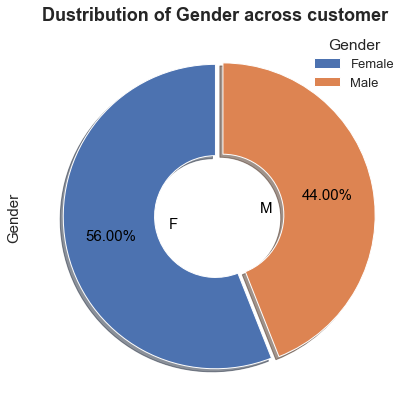

In [120]:
#plotting a pie chart to visualize the dustribution of Gender across customer
fig = plt.figure(figsize=(15,7))

mylabels= ['F', 'M']
space = np.ones(2)/30
plt.pie(cust_df['Gender'].value_counts(), startangle=90, labels=mylabels, labeldistance=0.25, autopct='%.2f%%', pctdistance=0.7, explode=[0,0.05], shadow=True, textprops={'fontsize':15, 'color':'black'}, wedgeprops=dict(width=0.6))

plt.title('Dustribution of Gender across customer', fontsize=18, fontweight='bold')
plt.ylabel('Gender', fontsize=15)
plt.legend(title='Gender', labels=('Female', 'Male'), loc='upper right', fontsize=13)
plt.show()


**Observations:**
- Female users are more (56%) compared to males.

**<h4>Question 2: How is the distribution of the customers as per the Age group</h4>**

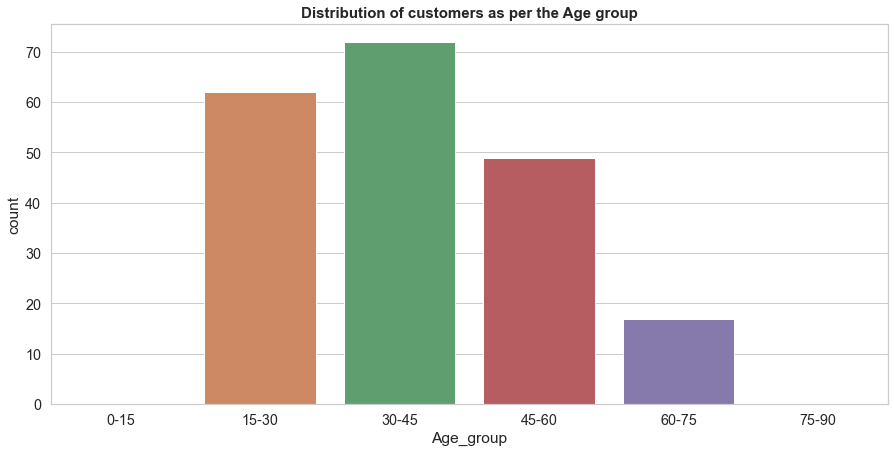

In [121]:
#plotting the distribution of the customers as per the Age group
plt.figure(figsize=(15,7))
sns.countplot(cust_df['Age_group'])
plt.title('Distribution of customers as per the Age group', fontsize=15, fontweight='bold')
plt.show()

**<h4>Question 3: What is the distribution of numerical features - Age, Annual Income and Spending Score?</h4>**

**Univariate Analysis of numerical features - Age, Annual Income, Spending Score**

In [122]:
num_cols = cust_df.select_dtypes(include=np.number).columns.to_list()
num_cols


['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

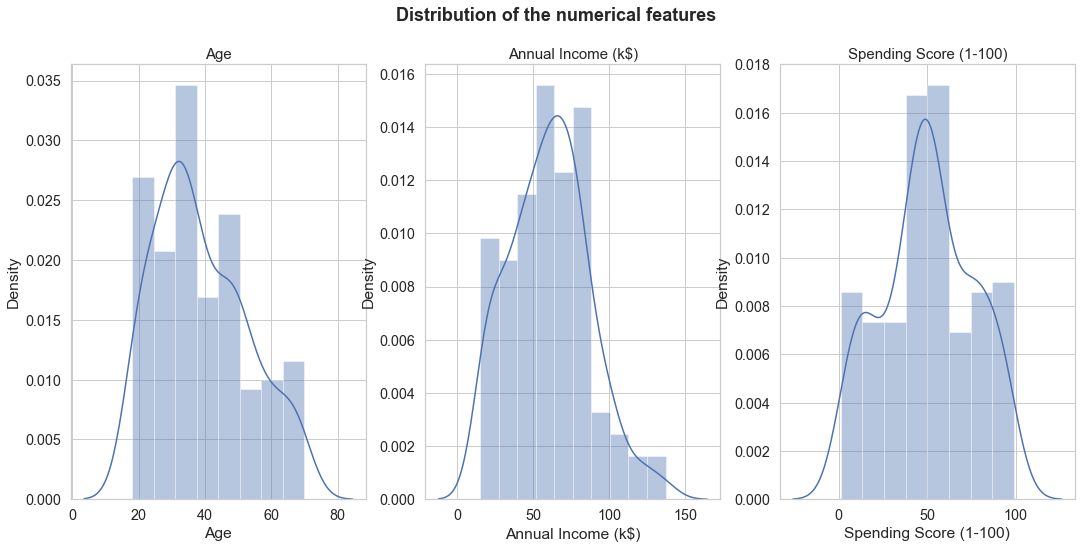

In [123]:
k=0
plt.figure(figsize=(18,8))
for col in num_cols:
    k=k+1
    plt.subplot(1, 3, k)
    sns.distplot(cust_df[col], hist=True, kde=True)
    plt.suptitle('Distribution of the numerical features', fontsize=18, fontweight='bold')
    plt.title(col, fontsize=15)
    

**Observations:**
> **Age**
 - graph is slightly skewed to the right, ie., the majority of data points cluster on the lower end of the scale, with a few significantly higher values stretching out to the righ
 - We see that 50% of the customers are below 35-36yrs old.
 - Majority of the customers are below 50yrs.

 
> **Annual Income**
 - The __average income is around 60K.__ 
 - Majority of the customers earn between 50-80K annually.
 - Only few of the customers have Annual Income more than 80K
 
> **Spending Score**
 - Spending score range __from 1 - 99__
 - It is evenly distributed.

**<h4>Question 4: Are there any outliers present in Annual Income features </h4>**

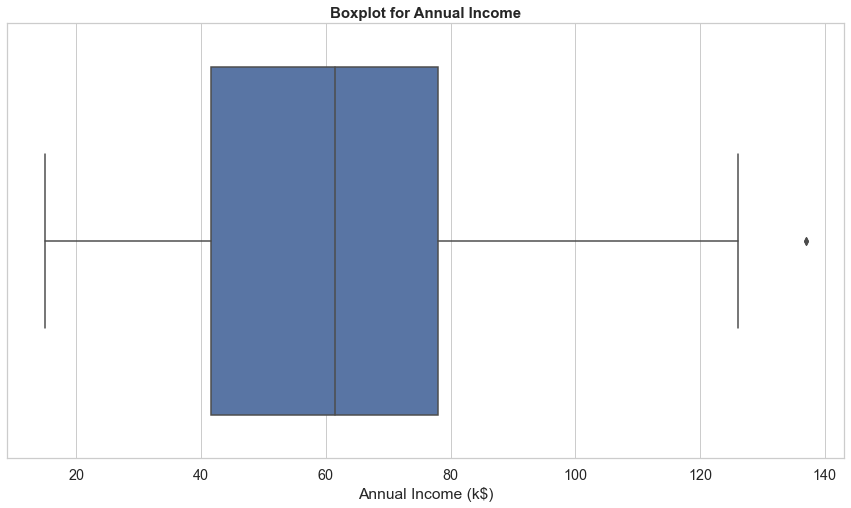

In [124]:
# Boxplot for the annual Income
plt.figure(figsize=(15,8))
sns.boxplot(cust_df[num_cols[1]])
plt.title('Boxplot for Annual Income', fontsize=15, fontweight='bold')
plt.show()

In [125]:
#finding the details who has an outlier in income
Q1 = np.percentile(cust_df[num_cols[1]], 25)
Q3 = np.percentile(cust_df[num_cols[1]], 75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
outlier = [income for income in cust_df[num_cols[1]] if income > upper or income < lower]
print(outlier)

[137, 137]


In [126]:
cust_df[cust_df[num_cols[1]] > 130]

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_group
198,Male,32,137,18,30-45
199,Male,30,137,83,15-30


### **Bivariate Analysis**

**<h4> Question 5: How is the spending score among the two gender group? </h4>**

<Figure size 1080x576 with 0 Axes>

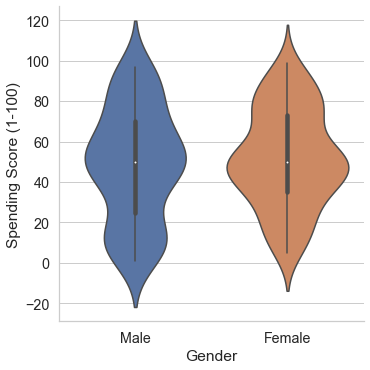

In [127]:
plt.figure(figsize=(15,8))
sns.catplot(x ='Gender', y=num_cols[2], data=cust_df, kind='violin')

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

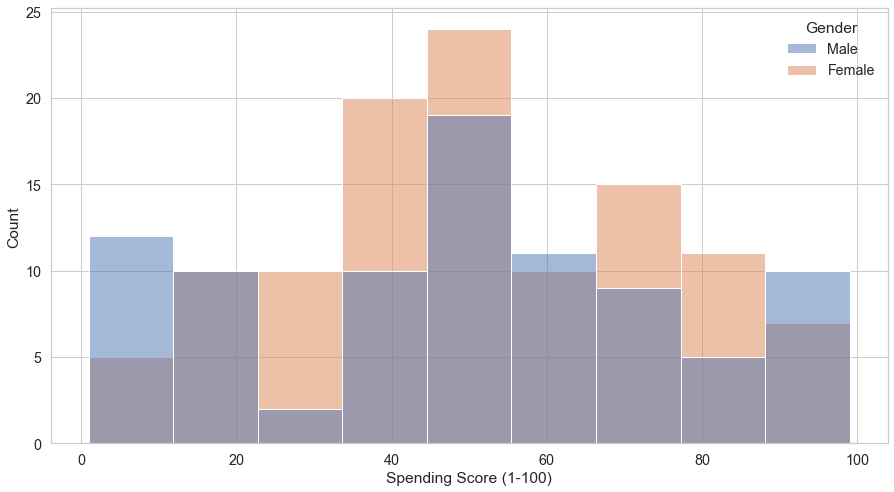

In [128]:
plt.figure(figsize=(15,8))
sns.histplot(x= num_cols[2], data=cust_df, hue='Gender')

**Observation:**
- In general Females have high Spending score than Males.

**<h4> Question 6: How is the distribution of spending score wrt Annual Income? </h4>**

Text(0.5, 1.05, 'Distribution of spending score wrt Annual Income')

<Figure size 1296x576 with 0 Axes>

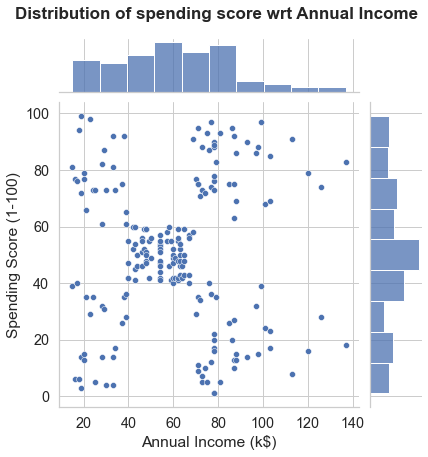

In [129]:
plt.figure(figsize=(18,8))
g = sns.JointGrid(data=cust_df, x=num_cols[1], y=num_cols[2])
g.plot(sns.scatterplot, sns.histplot)

plt.suptitle('Distribution of spending score wrt Annual Income', fontsize=17, fontweight='bold', y=1.05)

**<h4> Question 7: How is the distribution of spending score wrt Age? </h4>**

Text(0.5, 1.05, 'Distribution of spending score wrt Age')

<Figure size 1296x576 with 0 Axes>

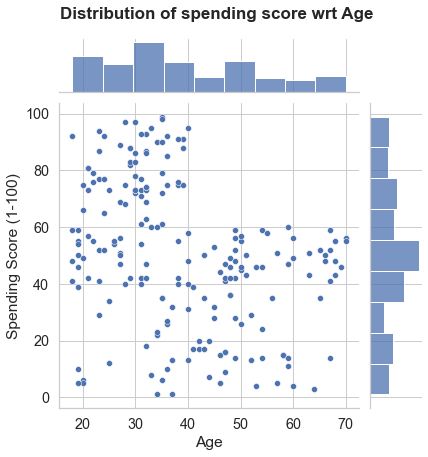

In [130]:
plt.figure(figsize=(18,8))
g = sns.JointGrid(data=cust_df, x=num_cols[0], y=num_cols[2])
g.plot(sns.scatterplot, sns.histplot)

plt.suptitle('Distribution of spending score wrt Age', fontsize=17, fontweight='bold', y=1.05)

**Observation:**
- Spending score is generally high __more than 40 between the age 17-39 yrs.__


**Analysing the relation between the various numerical features - Age, Annual Income and Spending score**

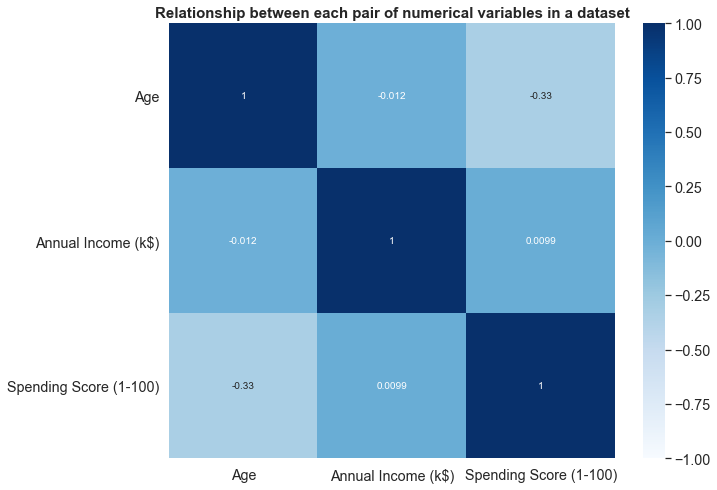

In [131]:
#Analysing the relation between the various numerical features - Age, Annual Income and Spending score
plt.figure(figsize=(10,8))
sns.heatmap(cust_df[num_cols].corr(), vmin=-1, vmax=1, annot=True,cmap='Blues')
plt.title('Relationship between each pair of numerical variables in a dataset', fontsize=15, fontweight='bold')
plt.yticks(rotation=0)
plt.show()


<a name = Section7></a>

---
# **7. Post Data Processing & Feature Selection**
---

In [132]:
cust_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_group
0,Male,19,15,39,15-30
1,Male,21,15,81,15-30
2,Female,20,16,6,15-30
3,Female,23,16,77,15-30
4,Female,31,17,40,30-45


<a name = Section72></a>
### **7.1 Encoding Categorical Features**

In [133]:
# encoding the gender column
cust_df['Gender'] = LabelEncoder().fit_transform(cust_df['Gender'])
cust_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_group
0,1,19,15,39,15-30
1,1,21,15,81,15-30
2,0,20,16,6,15-30
3,0,23,16,77,15-30
4,0,31,17,40,30-45


<a name = Section71></a>
### **7.2 Data Scaling**
- In this section, we will **scale** our **features** to ensure that one feature doesn't have more impact than others in terms of weights.

- The **K-Means** algorithm **do not handle skewed distributions** well. So we will log transform the age feature to have a uniform distribution

In [134]:
# Log transformation to handle positive skewness
np.log(cust_df['Age']).describe()

count   200.00000
mean      3.59417
std       0.36707
min       2.89037
25%       3.35852
50%       3.58352
75%       3.89182
max       4.24850
Name: Age, dtype: float64

In [135]:
cust_df['Age'] = np.log(cust_df['Age'])
cust_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_group
0,1,2.94444,15,39,15-30
1,1,3.04452,15,81,15-30
2,0,2.99573,16,6,15-30
3,0,3.13549,16,77,15-30
4,0,3.43399,17,40,30-45


In [136]:
#dropping the Age_group from clustering analysis
data = cust_df.drop('Age_group',axis=1)
data.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,2.94444,15,39
1,1,3.04452,15,81
2,0,2.99573,16,6
3,0,3.13549,16,77
4,0,3.43399,17,40


In [137]:
#SCaling the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_frame = pd.DataFrame(data=scaled_data, columns=data.columns)
scaled_frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.12815,-1.77448,-1.73900,-0.43480
1,1.12815,-1.50114,-1.73900,1.19570
2,-0.88641,-1.63439,-1.70083,-1.71591
3,-0.88641,-1.25269,-1.70083,1.04042
4,-0.88641,-0.43747,-1.66266,-0.39598


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---



<a name = Section81></a>
### **8.1 Clustering Annual Income and Spending score**

**<h4>Elbow Analysis: Finding Optimal K </h4>**

- We will **iterate** our **model** over some iterations, **finding optimal K** value (number of clusters) for clustering.

- We check inertia, defined as the **mean squared distance** between each instance and its closest centroid. 

- Logically, as per the definition **lower the inertia better the model**.

In [247]:
X_AI_S = scaled_frame.iloc[:,[2,3]]
X_AI_S.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.73900,-0.43480
1,-1.73900,1.19570
2,-1.70083,-1.71591
3,-1.70083,1.04042
4,-1.66266,-0.39598


In [248]:
# finding wcss value for different number of clusters
wcss = []

for i in range(2, 16):
    km_model1 = KMeans(n_clusters=i, init='k-means++', max_iter=500, random_state=40)
    km_model1.fit(X_AI_S)
    wcss.append(km_model1.inertia_)

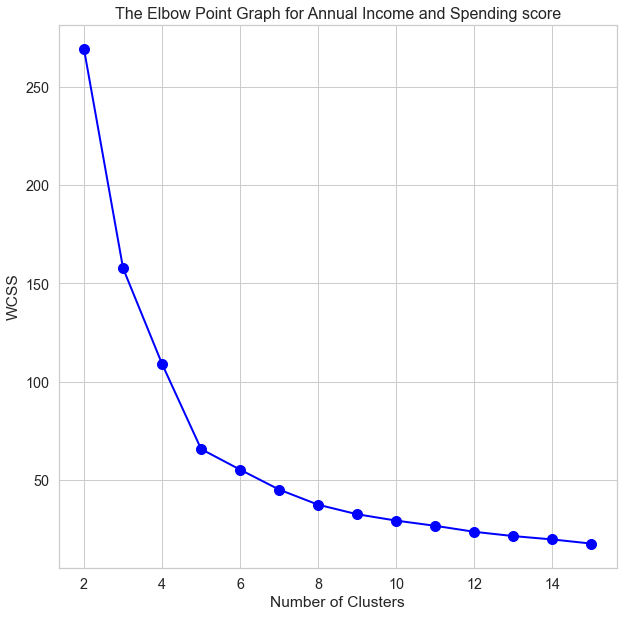

In [249]:
# plotting Inertia vs K Values graph / Elbow graph

plt.figure(figsize=(10,10))
plt.plot(range(2,16), wcss, marker='o', linestyle='-', color='blue', markersize=10, linewidth=2, label='WCSS')
plt.title('The Elbow Point Graph for Annual Income and Spending score', size=16)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

- from the above graph we can see that the elbow is at K = 5

In [250]:
km_model1 = KMeans(n_clusters=5, init='k-means++', random_state=42)
km_model1.fit_predict(X_AI_S)
X_AI_S['Clusters'] = km_model1.labels_
centers = km_model1.cluster_centers_

In [251]:
km_model1.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [252]:
km_model1.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275]])

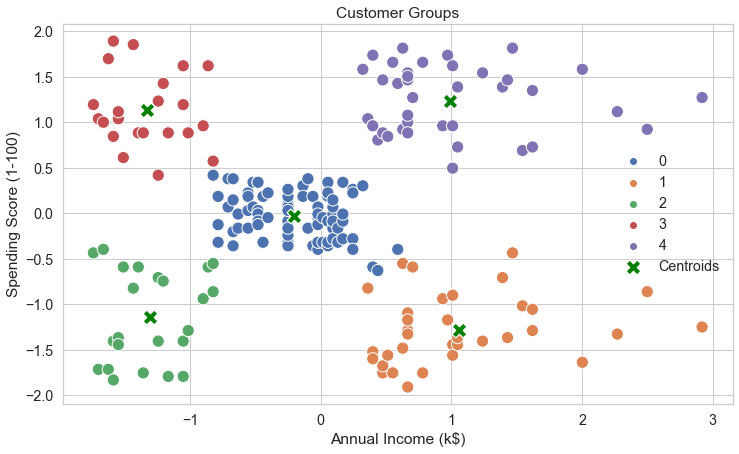

In [253]:
# Plotting the Clusters and the centroids
plt.figure(figsize=(12,7))

sns.scatterplot(data=X_AI_S, x= X_AI_S.columns[0], y=X_AI_S.columns[1], hue=X_AI_S.columns[2], s=150, palette="deep")

# Plot the centroidsX.columns[1]
centroids = pd.DataFrame(km_model1.cluster_centers_, columns=X_AI_S.columns[0:2])
sns.scatterplot(data=centroids, x=X_AI_S.columns[0], y= X_AI_S.columns[1], color='green', s=220, label='Centroids', marker='X')
plt.title('Customer Groups')
plt.show()


**Lets look at the frequency count of each cluster**

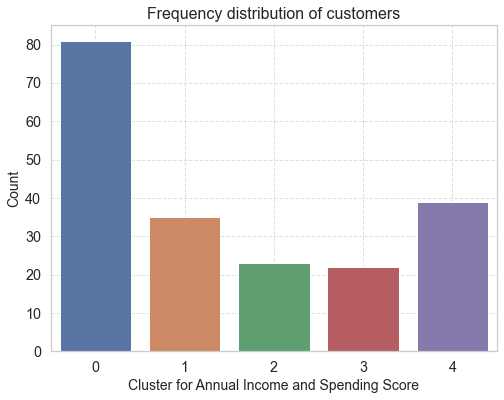

In [272]:
cluster_labels = pd.Series(km_model1.labels_, name='Cluster')

plt.figure(figsize=(8, 6))
sns.countplot(x=X_AI_S['Clusters'], palette='deep')
plt.title('Frequency distribution of customers', fontsize=16)
plt.xlabel('Cluster for Annual Income and Spending Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [278]:
X_AI_S.groupby('Clusters').mean().style.background_gradient(cmap='Blues')

,Annual Income (k$),Spending Score (1-100)
Clusters,,
0,-0.200913,-0.026456
1,1.055003,-1.284439
2,-1.307519,-1.136965
3,-1.329545,1.132178
4,0.991583,1.239503


**Observation**
- __Cluster 0__ - Customers in Cluster 0 have __low annual incomes__ but maintain __average spending__. They manage their finances carefully, balancing essential and discretionary purchases.
- __Cluster 1__ - Cluster 1 includes customers with __high incomes__ but __low spending__. They prefer saving or investing over spending, indicating a conservative financial approach.
- __Cluster 2__ - Customers in Cluster 2 have __very low incomes__ and __low spending__, focusing on essential needs with minimal expenditures due to limited financial resources.
- __Cluster 3__ - Cluster 3 features customers with __very low incomes__ but __high spending__. Despite limited means, they prioritize spending on non-essential or luxury items.
- __Cluster 4__ - Cluster 4 consists of __affluent customers__ with __high spending__. They are key targets for luxury goods or premium services, reflecting both financial capability and a strong willingness to spend.


<a name = Section81></a>
### **8.1 Clustering Age and Spending score**

**<h4>Elbow Analysis: Finding Optimal K </h4>**

In [291]:
X_Age_Spend = scaled_frame.iloc[:,[1,3]]
X_Age_Spend.head()

,Age,Spending Score (1-100)
0,-1.77448,-0.43480
1,-1.50114,1.19570
2,-1.63439,-1.71591
3,-1.25269,1.04042
4,-0.43747,-0.39598


In [292]:
# finding wcss value for different number of clusters
wcss = []

for i in range(2, 16):
    km_model2 = KMeans(n_clusters=i, init='k-means++', max_iter=500, random_state=40)
    km_model2.fit(X_Age_Spend)
    wcss.append(km_model2.inertia_)

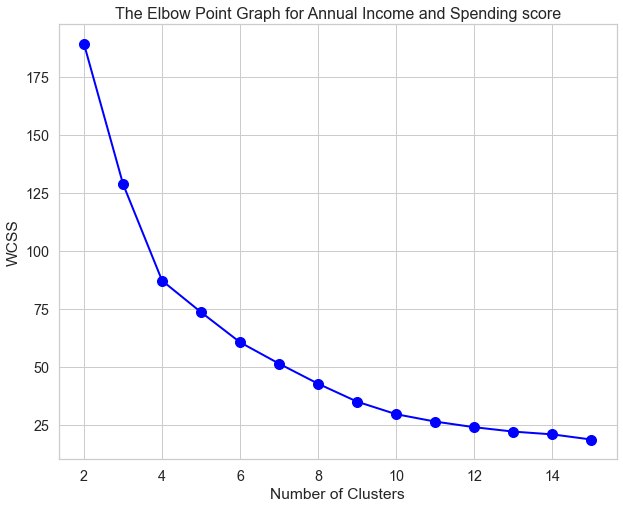

In [285]:
# plotting Inertia vs K Values graph / Elbow graph

plt.figure(figsize=(10,8))
plt.plot(range(2,16), wcss, marker='o', linestyle='-', color='blue', markersize=10, linewidth=2, label='WCSS')
plt.title('The Elbow Point Graph for Annual Income and Spending score', size=16)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

- from the above graph we can see that the elbow is at K = 4

In [293]:
km_model2 = KMeans(n_clusters=6, init='k-means++', random_state=42)
km_model2.fit_predict(X_Age_Spend)
X_Age_Spend['Clusters'] = km_model2.labels_
centers = km_model2.cluster_centers_

In [294]:
km_model2.cluster_centers_

array([[ 1.16172098, -0.0668406 ],
       [-1.3694735 ,  0.61060769],
       [-0.33876643,  1.28542501],
       [-0.15953997, -0.30741823],
       [ 0.70898018, -1.4053405 ],
       [-1.55903266, -0.87975629]])

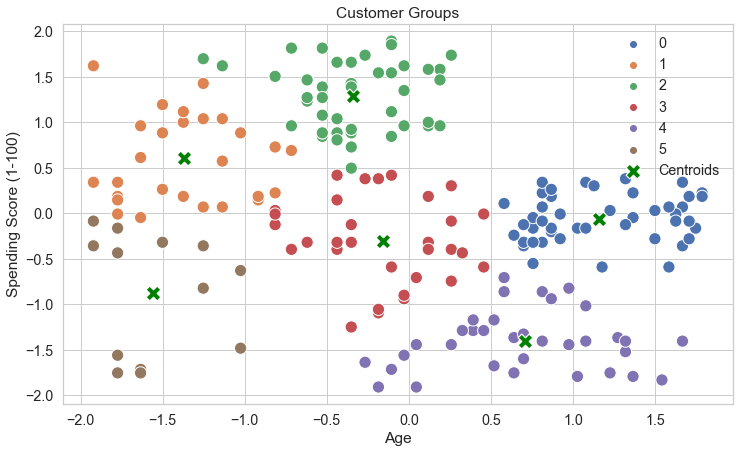

In [295]:
# Plotting the Clusters and the centroids

plt.figure(figsize=(12,7))

sns.scatterplot(data=X_Age_Spend, x= X_Age_Spend.columns[0], y=X_Age_Spend.columns[1], hue=X_Age_Spend.columns[2], s=150, palette="deep", legend='full')

# Plot the centroids
centroids = pd.DataFrame(km_model2.cluster_centers_, columns=X.columns[0:2])
sns.scatterplot(data=centroids, x=X_Age_Spend.columns[0], y= X_Age_Spend.columns[1], color='green', s=220, label='Centroids', marker='X')
plt.title('Customer Groups')
plt.show()


**Lets look at the frequency count of each cluster**

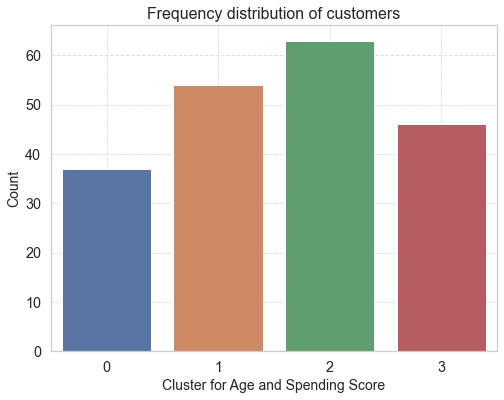

In [279]:
plt.figure(figsize=(8, 6))
sns.countplot(x=X_Age_Spend['Clusters'], palette='deep')
plt.title('Frequency distribution of customers', fontsize=16)
plt.xlabel('Cluster for Age and Spending Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<a name = Section9></a>

---
# **9. Conclusion**
---

<a name = Section91></a>
### **9.1 Conclusion**
- We **studied in depth about the data**, its **characteristics** and its **distribution**.

- We **explored various questions** related to the **customers demographics** and their **Spending**.

- We **scaled** our **data** and performed model development and **identified clusters** that can be used to **segment** our **customers**.

- Finding an optimal number of **unique customer groups** will help understand how customers differ, and help give them exactly what they want. 

- Customer segmentation **improves customer experience and boosts company revenue**. 

<a name = Section92></a>
### **9.2 Actionable Insights**
- Now the company can use these segmentations to **prioritize** their **customers**.

- They can **offer discounts** and **promotional offers** to these customers.